In [1]:
import os
import sys

data_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if data_path not in sys.path:
    sys.path.append(data_path)

print("Final sys.path:", sys.path)

Final sys.path: ['/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '__editable__.lag_llama-0.1.0.finder.__path_hook__', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/opt/anaconda3/lib/python3.12/site-packages/setuptools/_vendor', '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial']


In [2]:
!pip install uv
!uv pip install -q autogluon.timeseries --system
!uv pip uninstall -q torchaudio torchvision torchtext --system

In [3]:
snp500_daily

Price,Date,Close,High,Low,Open,Volume,Log_Close,Return,LogReturn,NormalizedPrice,NormalizedPriceMinMax
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,
1,2004-12-27,1204.920044,1214.130005,1204.920044,1210.130005,922000000,7.094168,-0.004305,-0.004315,-0.899569,0.097602
2,2004-12-28,1213.540039,1213.540039,1204.920044,1204.920044,983000000,7.101297,0.007154,0.007129,-0.892788,0.099194
3,2004-12-29,1213.449951,1213.849976,1210.949951,1213.540039,925900000,7.101223,-0.000074,-0.000074,-0.892859,0.099177
4,2004-12-30,1213.550049,1216.469971,1213.410034,1213.449951,829800000,7.101305,0.000082,0.000082,-0.892780,0.099196
5,2004-12-31,1211.920044,1217.329956,1211.650024,1213.550049,786900000,7.099961,-0.001343,-0.001344,-0.894063,0.098895
...,...,...,...,...,...,...,...,...,...,...,...
5028,2024-12-16,6074.080078,6085.189941,6059.140137,6063.790039,4391100000,8.711786,0.003799,0.003792,2.930994,0.997009
5029,2024-12-17,6050.609863,6057.680176,6035.189941,6052.549805,4544500000,8.707914,-0.003864,-0.003871,2.912530,0.992674
5030,2024-12-18,5872.160156,6070.669922,5867.790039,6047.649902,5246960000,8.677978,-0.029493,-0.029937,2.772144,0.959712


In [5]:
df = snp500_daily

In [6]:
snp500 = df[['Date', 'Close']]
snp500

Price,Date,Close
Ticker,,^GSPC
1,2004-12-27,1204.920044
2,2004-12-28,1213.540039
3,2004-12-29,1213.449951
4,2004-12-30,1213.550049
5,2004-12-31,1211.920044
...,...,...
5028,2024-12-16,6074.080078
5029,2024-12-17,6050.609863
5030,2024-12-18,5872.160156


In [16]:
snp500['item_id'] = 'SPX'
snp500

/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_59160/2238544101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp500['item_id'] = 'SPX'


Price,Date,Close,item_id
Ticker,,^GSPC,
1,2004-12-27,1204.920044,SPX
2,2004-12-28,1213.540039,SPX
3,2004-12-29,1213.449951,SPX
4,2004-12-30,1213.550049,SPX
5,2004-12-31,1211.920044,SPX
...,...,...,...
5028,2024-12-16,6074.080078,SPX
5029,2024-12-17,6050.609863,SPX
5030,2024-12-18,5872.160156,SPX


In [7]:
snp500.columns = snp500.columns.get_level_values(0)  # Flatten the multi-index columns

In [24]:
snp500.columns.name = None


In [25]:
snp500

,Date,Close
1,2004-12-27,1204.920044
2,2004-12-28,1213.540039
3,2004-12-29,1213.449951
4,2004-12-30,1213.550049
5,2004-12-31,1211.920044
...,...,...
5028,2024-12-16,6074.080078
5029,2024-12-17,6050.609863
5030,2024-12-18,5872.160156
5031,2024-12-19,5867.080078


In [11]:
foo = snp500.reset_index()

In [13]:
foo = foo.reset_index(drop=True)

In [15]:
foo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   5032 non-null   int64         
 1   Date    5032 non-null   datetime64[ns]
 2   Close   5032 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 118.1 KB


In [23]:
# Check the index of the DataFrame
# List all column names
# Remove the name of the columns index
foo.columns.name = None
foo
# Drop the 'index' column
foo = foo.drop(columns=['index'])
foo

,Date,Close
0,2004-12-27,1204.920044
1,2004-12-28,1213.540039
2,2004-12-29,1213.449951
3,2004-12-30,1213.550049
4,2004-12-31,1211.920044
...,...,...
5027,2024-12-16,6074.080078
5028,2024-12-17,6050.609863
5029,2024-12-18,5872.160156
5030,2024-12-19,5867.080078


In [17]:
# Remove multi-index by resetting the column names
snp500.columns = snp500.columns.get_level_values(0)  # Flatten the multi-index columns

# Drop the 'Price' column if it exists
if 'Price' in snp500.columns:
    snp500 = snp500.drop(columns=['Price'])

# Keep only relevant columns
snp500 = snp500[['Date', 'Close', 'item_id']]

# Display the cleaned DataFrame
snp500.head()


Price,Date,Close,item_id
1,2004-12-27,1204.920044,SPX
2,2004-12-28,1213.540039,SPX
3,2004-12-29,1213.449951,SPX
4,2004-12-30,1213.550049,SPX
5,2004-12-31,1211.920044,SPX


In [22]:
snp500 = snp500.reset_index()
# snp500 = snp500.drop(columns=['Price'])
snp500

ValueError: cannot insert level_0, already exists

In [27]:
foo2 = snp500

In [28]:
foo2['item_id'] = 'SPX'

/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_60225/811527452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo2['item_id'] = 'SPX'


In [29]:
foo2

,Date,Close,item_id
1,2004-12-27,1204.920044,SPX
2,2004-12-28,1213.540039,SPX
3,2004-12-29,1213.449951,SPX
4,2004-12-30,1213.550049,SPX
5,2004-12-31,1211.920044,SPX
...,...,...,...
5028,2024-12-16,6074.080078,SPX
5029,2024-12-17,6050.609863,SPX
5030,2024-12-18,5872.160156,SPX
5031,2024-12-19,5867.080078,SPX


In [40]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# Prepare the data
tsdf = TimeSeriesDataFrame.from_data_frame(
    foo2,
    id_column='item_id',
    timestamp_column='Date',
)

prediction_length = 1

# Split the data
train_data, test_data = tsdf.train_test_split(prediction_length)

# Create and use the predictor
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="Close",
    freq="D",
).fit(
    train_data,
    presets="bolt_base"  # Using Chronos-bolt-base model
)

# Generate predictions
predictions = predictor.predict(train_data)

Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250223_040422'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       14.00 GB / 36.00 GB (38.9%)
Disk Space Avail:   660.44 GB / 926.35 GB (71.3%)


Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 5,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'Close',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
Provided train_data has 7292 rows (NaN fraction=31.1%), 1 time series. Median time series length is 7292 (min=7292, max=7292). 

Provided data contains following columns:
	target: 'Close'

AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-02-23 04:04:23
Models 

data with frequency 'None' has been resampled to frequency 'D'.


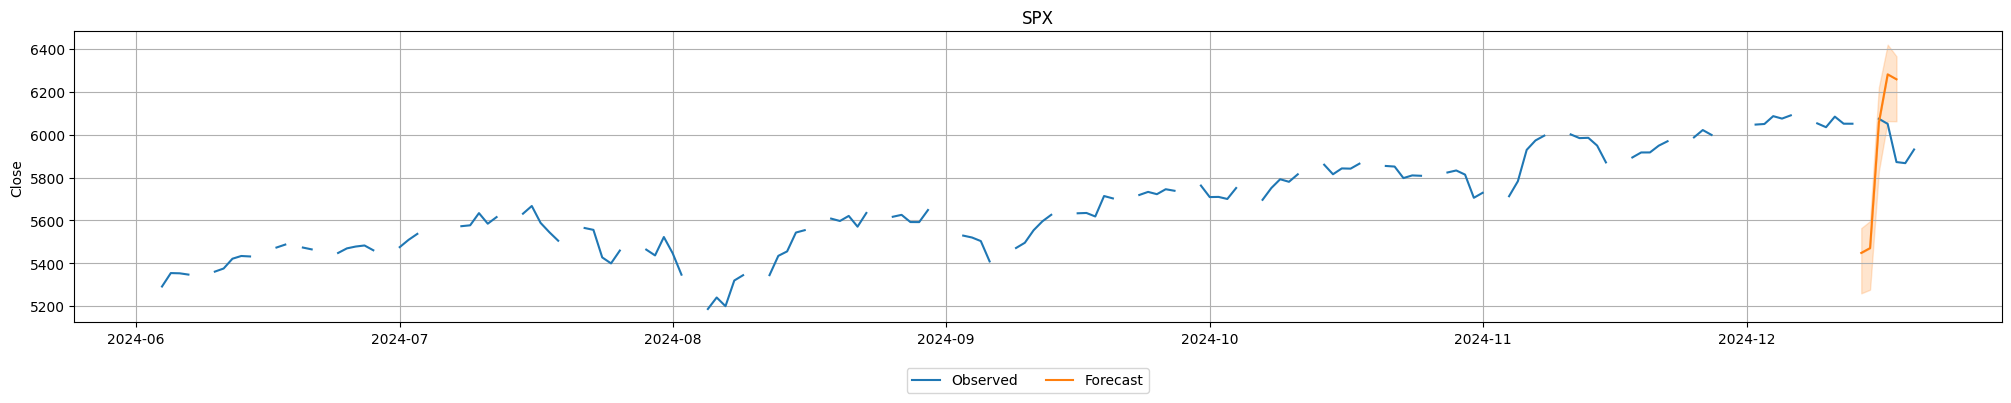

In [41]:
predictor.plot(
    data=tsdf,
    predictions=predictions,
    item_ids=tsdf.item_ids[:2],
    max_history_length=200,
)

Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250305_023351-001'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.39 GB / 36.00 GB (23.3%)
Disk Space Avail:   609.69 GB / 926.35 GB (65.8%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'B',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection

Trial 0 metrics: {'MAE': 28.69410196691942, 'MSE': 1207.0802732525137, 'RMSE': 34.74306079280456, 'Z-NormalizedMAE': 0.4942605180024192, 'Z-NormalizedMSE': 0.3581481547612672, 'Z-NormalizedRMSE': 0.5984548059471719, 'MAPE': 0.660015569439844, 'SMAPE': 0.662198809722918, 'MASE': 1.007380981786098, 'DirectionalAccuracy': 42.10526315789473}

Chronos-bolt Metrics (Average ± Std over 1 runs):
MAE: 28.6941 ± 0.0000
MSE: 1207.0803 ± 0.0000
RMSE: 34.7431 ± 0.0000
Z-NormalizedMAE: 0.4943 ± 0.0000
Z-NormalizedMSE: 0.3581 ± 0.0000
Z-NormalizedRMSE: 0.5985 ± 0.0000
MAPE: 0.6600 ± 0.0000
SMAPE: 0.6622 ± 0.0000
MASE: 1.0074 ± 0.0000
DirectionalAccuracy: 42.1053 ± 0.0000



AutoGluon will gauge predictive performance using evaluation metric: 'WQL'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.

Starting training. Start time is 2025-03-05 02:34:24
Models that will be trained: ['Chronos[bolt_base]']
Training timeseries model Chronos[bolt_base]. 
	0.00    s     = Training runtime
Training complete. Models trained: ['Chronos[bolt_base]']
Total runtime: 0.09 s
Best model: Chronos[bolt_base]
data with frequency 'None' has been resampled to frequency 'B'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250305_023425'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Da

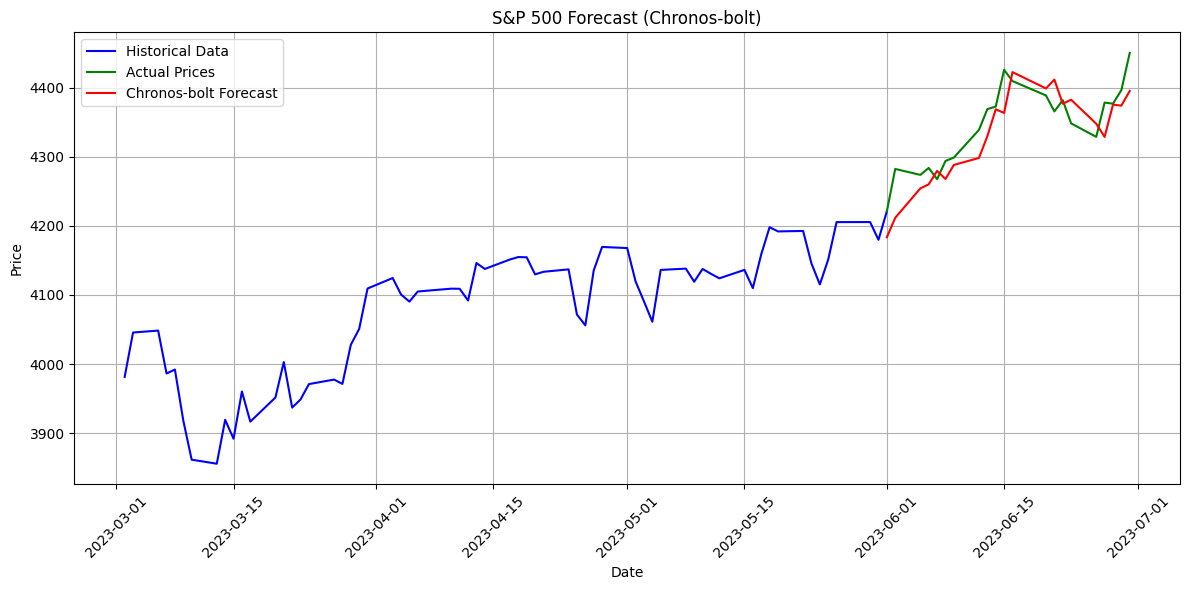

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.preprocessing import StandardScaler
from typing import Dict, List

from utils.metrics import calculate_metrics
from data.snp500 import snp500_daily 

# Shared Constants
CONTEXT_WINDOW = 63
FORECAST_STEPS = 21
CONFIDENCE_ALPHA = 0.2    # 80% confidence interval

# ======================
# Chronos-Bolt Implementation
# ======================
class ChronosBoltPredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.predictor = TimeSeriesPredictor(
            prediction_length=1,
            target="Close",
            quantile_levels=[0.1, 0.5, 0.9],
            freq='D',
        )
        self.is_fitted = False  # Remove this - we need per-window fitting

    def sliding_window_forecast(self, data, start_idx):
        forecasts = {'median': [], 'low': [], 'high': [], 'dates': []}
        
        for i in range(FORECAST_STEPS):
            current_idx = start_idx + i
            context_start = max(0, current_idx - CONTEXT_WINDOW)
            context_data = data.iloc[context_start:current_idx].copy()
            
            # 1. Add per-window scaling
            self.scaler.fit(context_data[['Close']])
            scaled_data = context_data.copy()
            scaled_data['Close'] = self.scaler.transform(scaled_data[['Close']])
            
            # 2. Convert scaled data to TSDF format
            context_tsdf = TimeSeriesDataFrame.from_data_frame(
                df=scaled_data,
                id_column='item_id',
                timestamp_column='Date'
            )
            
            # 3. Fit fresh model per window (like ARIMA)
            predictor = TimeSeriesPredictor(
                prediction_length=1,
                target="Close",
                quantile_levels=[0.1, 0.5, 0.9],
                freq='B',
            ).fit(context_tsdf, presets="bolt_base")
            
            # 4. Generate prediction
            forecast = predictor.predict(context_tsdf)
            forecast_values = forecast.iloc[0]
            
            # 5. Inverse scaling
            median = self.scaler.inverse_transform([[forecast_values['0.5']]])[0][0]
            low = self.scaler.inverse_transform([[forecast_values['0.1']]])[0][0]
            high = self.scaler.inverse_transform([[forecast_values['0.9']]])[0][0]
            
            forecasts['dates'].append(data['Date'].iloc[current_idx])
            forecasts['median'].append(median)
            forecasts['low'].append(low)
            forecasts['high'].append(high)
            
        return forecasts

# Plot and execution functions remain the same
def plot_individual_forecast(data, start_idx, forecasts, model_name):
    plt.figure(figsize=(12, 6))
    historical = data.iloc[start_idx-63:start_idx + 1]
    plt.plot(historical['Date'], historical['Close'], 'b-', label='Historical Data')
    
    actual_dates = data['Date'].iloc[start_idx:start_idx+FORECAST_STEPS]
    actual_values = data['Close'].iloc[start_idx:start_idx+FORECAST_STEPS]
    plt.plot(actual_dates, actual_values, 'g-', label='Actual Prices')
    
    forecast_dates = pd.to_datetime(forecasts['dates'])
    plt.plot(forecast_dates, forecasts['median'], 'r-', label=f'{model_name} Forecast')
    # plt.fill_between(forecast_dates, forecasts['low'], forecasts['high'], color='red', alpha=0.2)
    
    plt.title(f'S&P 500 Forecast ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def run_multiple_trials(data, start_idx, n_trials=10):
    # Get insample data
    insample = data['Close'].iloc[start_idx-CONTEXT_WINDOW:start_idx].values
    historical_last_point = data['Close'].iloc[start_idx - 1] if start_idx > 0 else None

    # Chronos-bolt trials
    chronos_metrics_list = []
    for trial in range(n_trials):
        chronos = ChronosBoltPredictor()
        chronos_preds = chronos.sliding_window_forecast(data, start_idx)
        actual = data['Close'].iloc[start_idx:start_idx+FORECAST_STEPS].values
        chronos_metrics = calculate_metrics(actual, chronos_preds['median'], insample=insample, historical_last_point=historical_last_point)
        chronos_metrics_list.append(chronos_metrics)
        print(f"Trial {trial} metrics:", chronos_metrics)
    
    # Calculate average and std for Chronos metrics
    chronos_avg_metrics = {}
    chronos_std_metrics = {}
    
    for metric in chronos_metrics_list[0].keys():
        values = [m[metric] for m in chronos_metrics_list]
        chronos_avg_metrics[metric] = np.mean(values)
        chronos_std_metrics[metric] = np.std(values)
    
    return chronos_avg_metrics, chronos_std_metrics

def main():
    # Process the data
    snp500 = snp500_daily.copy()
    snp500.columns = snp500.columns.get_level_values(0)  # Flatten multi-index
    if 'Price' in snp500.columns:
        snp500 = snp500.drop(columns=['Price'])
    snp500 = snp500[['Date', 'Close']]
    snp500['item_id'] = 'SPX'
    
    target_date = '2023-05-31'
    start_idx = snp500[snp500['Date'] <= pd.Timestamp(target_date)].index[-1]
    
    if start_idx < CONTEXT_WINDOW:
        raise ValueError(f"Need at least {CONTEXT_WINDOW} days of history")
    
    # Run multiple trials
    n_trials = 1
    chronos_avg_metrics, chronos_std_metrics = run_multiple_trials(
        snp500, start_idx, n_trials
    )
    
    print(f"\nChronos-bolt Metrics (Average ± Std over {n_trials} runs):")
    for metric in chronos_avg_metrics:
        print(f"{metric}: {chronos_avg_metrics[metric]:.4f} ± {chronos_std_metrics[metric]:.4f}")
    
    # Visualization with last trial
    chronos = ChronosBoltPredictor()
    chronos_preds = chronos.sliding_window_forecast(snp500, start_idx)
    plot_individual_forecast(snp500, start_idx, chronos_preds, "Chronos-bolt")

if __name__ == "__main__":
    main()

Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013434'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.87 GB / 36.00 GB (24.6%)
Disk Space Avail:   619.63 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 1/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013447'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.61 GB / 36.00 GB (23.9%)
Disk Space Avail:   619.62 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 2/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013458'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.72 GB / 36.00 GB (24.2%)
Disk Space Avail:   619.61 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 3/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013509'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.02 GB / 36.00 GB (22.3%)
Disk Space Avail:   619.57 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 4/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013521'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.53 GB / 36.00 GB (23.7%)
Disk Space Avail:   619.57 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 5/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013532'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.39 GB / 36.00 GB (23.3%)
Disk Space Avail:   619.56 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 6/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013543'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.44 GB / 36.00 GB (23.5%)
Disk Space Avail:   619.54 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 7/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013553'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.57 GB / 36.00 GB (23.8%)
Disk Space Avail:   619.54 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 8/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013605'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.62 GB / 36.00 GB (23.9%)
Disk Space Avail:   619.54 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 9/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013616'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.70 GB / 36.00 GB (24.2%)
Disk Space Avail:   619.52 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Trial 10/10 metrics: {'MAE': 44.54927325559247, 'MSE': 2422.6175135901967, 'RMSE': 49.22009258006528, 'Z-NormalizedMAE': 0.8828569730608298, 'Z-NormalizedMSE': 0.9514463584892761, 'Z-NormalizedRMSE': 0.9754211185376683, 'MAPE': 1.0274634493868327, 'SMAPE': 1.033918193775832, 'MASE': 1.5847469639728573, 'DirectionalAccuracy': 66.66666666666666}

Chronos-bolt Metrics (Average ± Std over 10 runs):
MAE: 44.5493 ± 0.0000
MSE: 2422.6175 ± 0.0000
RMSE: 49.2201 ± 0.0000
Z-NormalizedMAE: 0.8829 ± 0.0000
Z-NormalizedMSE: 0.9514 ± 0.0000
Z-NormalizedRMSE: 0.9754 ± 0.0000
MAPE: 1.0275 ± 0.0000
SMAPE: 1.0339 ± 0.0000
MASE: 1.5847 ± 0.0000
DirectionalAccuracy: 66.6667 ± 0.0000


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_013627'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.67 GB / 36.00 GB (24.1%)
Disk Space Avail:   619.51 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

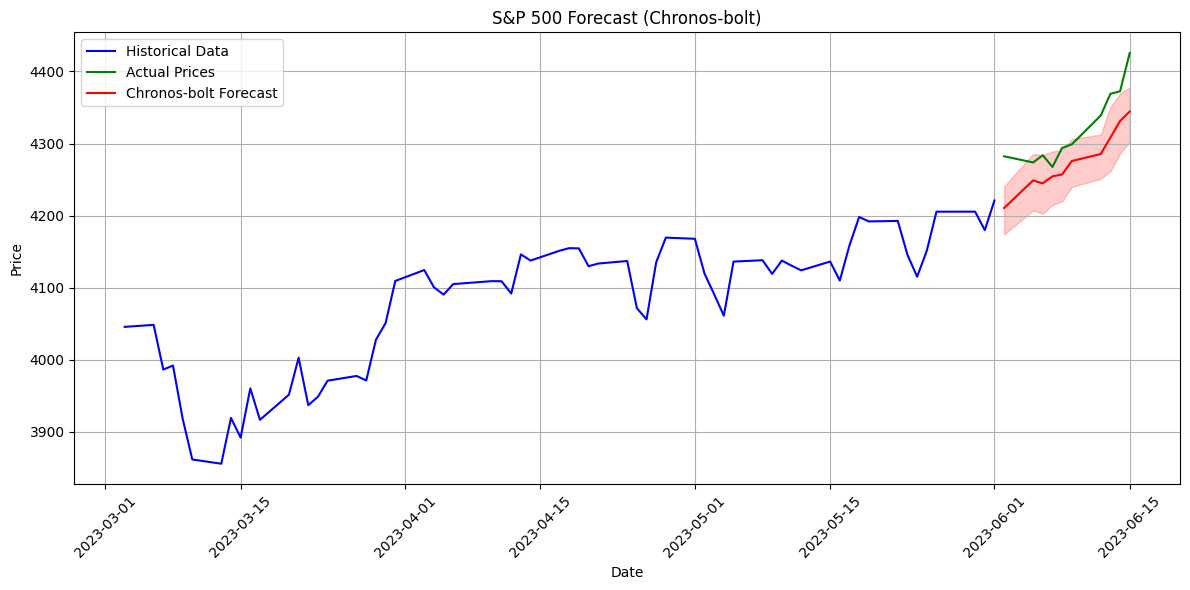

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.preprocessing import StandardScaler
from typing import Dict, List

from utils.metrics import calculate_metrics

# Shared Constants
CONTEXT_WINDOW = 63      
FORECAST_STEPS = 10
MIN_CONTEXT_SIZE = 10
CONFIDENCE_ALPHA = 0.2    # 80% confidence interval

# ======================
# Chronos-Bolt Implementation (Aligned Version)
# ======================
class ChronosBoltPredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        
    def sliding_window_forecast(self, data, start_idx):
        """Aligned sliding window forecast matching ARIMA/Chronos-T5 setup"""
        forecasts = {'median': [], 'low': [], 'high': [], 'dates': []}
        
        for i in range(FORECAST_STEPS):
            current_idx = start_idx + i
            context_start = max(0, current_idx - CONTEXT_WINDOW)
            context_data = data.iloc[context_start:current_idx].copy()
            
            # 1. Context validation
            if len(context_data) < MIN_CONTEXT_SIZE:
                raise ValueError(f"Insufficient context data (need ≥{MIN_CONTEXT_SIZE} samples, got {len(context_data)})")
            
            # 2. Per-window scaling
            self.scaler.fit(context_data[['Close']])
            scaled_close = self.scaler.transform(context_data[['Close']])
            scaled_data = context_data.copy()
            scaled_data['Close'] = scaled_close
            
            # 3. Convert to TimeSeriesDataFrame format
            context_tsdf = TimeSeriesDataFrame.from_data_frame(
                df=scaled_data,
                id_column='item_id',
                timestamp_column='Date'
            )
            
            try:
                # 4. Create fresh predictor per window (like ARIMA)
                predictor = TimeSeriesPredictor(
                    prediction_length=1,
                    target="Close",
                    quantile_levels=[0.1, 0.5, 0.9],
                    freq='D',
                ).fit(context_tsdf, presets="bolt_base")
                
                # 5. Generate prediction
                forecast = predictor.predict(context_tsdf)
                forecast_values = forecast.iloc[0]
                
                # 6. Inverse scaling
                median = self.scaler.inverse_transform([[forecast_values['0.5']]])[0][0]
                low = self.scaler.inverse_transform([[forecast_values['0.1']]])[0][0]
                high = self.scaler.inverse_transform([[forecast_values['0.9']]])[0][0]
                
            except Exception as e:
                print(f"Bolt error: {str(e)}")
                # Fallback to last value with adjustment
                last_val = context_data['Close'].iloc[-1]
                low = last_val * 0.99
                median = last_val
                high = last_val * 1.01
            
            forecasts['dates'].append(data['Date'].iloc[current_idx])
            forecasts['median'].append(median)
            forecasts['low'].append(low)
            forecasts['high'].append(high)
        
        return forecasts

# ======================
# Updated Plotting Function
# ======================
def plot_individual_forecast(data, start_idx, forecasts, model_name):
    plt.figure(figsize=(12, 6))
    
    # Historical data (context window only)
    historical_start = max(0, start_idx - CONTEXT_WINDOW)
    historical = data.iloc[historical_start:start_idx]
    plt.plot(historical['Date'], historical['Close'], 'b-', label='Historical Data')
    
    # Actual values
    actual_dates = data['Date'].iloc[start_idx:start_idx+FORECAST_STEPS]
    actual_values = data['Close'].iloc[start_idx:start_idx+FORECAST_STEPS]
    plt.plot(actual_dates, actual_values, 'g-', label='Actual Prices')
    
    # Forecasts
    forecast_dates = pd.to_datetime(forecasts['dates'])
    plt.plot(forecast_dates, forecasts['median'], 'r-', label=f'{model_name} Forecast')
    plt.fill_between(
        forecast_dates, 
        forecasts['low'], 
        forecasts['high'], 
        color='red', 
        alpha=0.2
    )
    
    plt.title(f'S&P 500 Forecast ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ======================
# Updated Trials Function
# ======================
def run_multiple_trials(data, start_idx, n_trials=10):
    """Aligned trial runner matching ARIMA/Chronos-T5 setup"""
    # Get insample data (context window only)
    insample = data['Close'].iloc[start_idx-CONTEXT_WINDOW:start_idx].values
    
    # Actual values
    actual = data['Close'].iloc[start_idx:start_idx+FORECAST_STEPS].values
    
    # Chronos-bolt trials
    chronos_metrics_list = []
    for trial in range(n_trials):
        chronos = ChronosBoltPredictor()
        chronos_preds = chronos.sliding_window_forecast(data, start_idx)
        
        # Handle potential length mismatches
        pred_length = min(len(chronos_preds['median']), len(actual))
        
        chronos_metrics = calculate_metrics(
            actual[:pred_length], 
            chronos_preds['median'][:pred_length], 
            insample=insample
        )
        chronos_metrics_list.append(chronos_metrics)
        print(f"Trial {trial+1}/{n_trials} metrics:", chronos_metrics)
    
    # Calculate average and std
    chronos_avg_metrics = {
        metric: np.mean([m[metric] for m in chronos_metrics_list]) 
        for metric in chronos_metrics_list[0]
    }
    chronos_std_metrics = {
        metric: np.std([m[metric] for m in chronos_metrics_list]) 
        for metric in chronos_metrics_list[0]
    }
    
    return chronos_avg_metrics, chronos_std_metrics

# ======================
# Main Function
# ======================
def main():
    # Data preparation (preserve original structure)
    snp500 = snp500_daily[['Date', 'Close']].copy()
    snp500['item_id'] = 'SPX'  # Required for TimeSeriesDataFrame
    
    # Find test start index (aligned with other implementations)
    test_date_str = "2023-06-01"
    try:
        test_date = pd.Timestamp(test_date_str)
        date_indices = snp500[snp500['Date'] <= test_date].index
        test_start = date_indices[-1]
    except Exception as e:
        print(f"Error finding test start: {str(e)}")
        test_start = int(len(snp500) * 0.8)
    
    # Validate context window
    if test_start < CONTEXT_WINDOW + MIN_CONTEXT_SIZE:
        raise ValueError(f"Need at least {CONTEXT_WINDOW + MIN_CONTEXT_SIZE} days of history")
    
    # Run trials
    n_trials = 10
    chronos_avg_metrics, chronos_std_metrics = run_multiple_trials(
        snp500, test_start, n_trials
    )
    
    # Print results
    print(f"\nChronos-bolt Metrics (Average ± Std over {n_trials} runs):")
    for metric in chronos_avg_metrics:
        print(f"{metric}: {chronos_avg_metrics[metric]:.4f} ± {chronos_std_metrics[metric]:.4f}")
    
    # Final visualization
    chronos = ChronosBoltPredictor()
    chronos_preds = chronos.sliding_window_forecast(snp500, test_start)
    plot_individual_forecast(snp500, test_start, chronos_preds, "Chronos-bolt")

if __name__ == "__main__":
    main()

Beginning AutoGluon training...


AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010909'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.59 GB / 36.00 GB (23.9%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'Close',
 'verbo

Running 1 trials for Chronos-Bolt-Base
Starting trial 1/1
Step 1/10: Fitting model on 63 data points


python(75933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75943) Malloc

Step 2/10: Fitting model on 63 data points


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010914'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.64 GB / 36.00 GB (24.0%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 

Step 3/10: Fitting model on 63 data points


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010916'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.71 GB / 36.00 GB (24.2%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Step 4/10: Fitting model on 63 data points


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010917'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.68 GB / 36.00 GB (24.1%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 

Step 5/10: Fitting model on 63 data points


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010918'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.71 GB / 36.00 GB (24.2%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Step 6/10: Fitting model on 63 data points


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010919'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.73 GB / 36.00 GB (24.3%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Step 7/10: Fitting model on 63 data points


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010920'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.73 GB / 36.00 GB (24.3%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Step 8/10: Fitting model on 63 data points


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]
Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010922'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.72 GB / 36.00 GB (24.2%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 

Step 9/10: Fitting model on 63 data points


Beginning AutoGluon training...
AutoGluon will save models to '/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/benchmarks/chronos_vs_arima/AutogluonModels/ag-20250304_010923'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.3.0: Wed Dec 20 21:31:10 PST 2023; root:xnu-10002.81.5~7/RELEASE_ARM64_T6031
CPU Count:          14
GPU Count:          0
Memory Avail:       8.71 GB / 36.00 GB (24.2%)
Disk Space Avail:   619.66 GB / 926.35 GB (66.9%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'D',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.5, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': T

Step 10/10: Fitting model on 63 data points


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]


Trial 1 metrics: {'MAE': 40.64873046875, 'MSE': 1940.1828758239747, 'RMSE': 44.047507033020324, 'Z-NormalizedMAE': 0.905850327371751, 'Z-NormalizedMSE': 0.9635218898655394, 'Z-NormalizedRMSE': 0.9815915086559885, 'MAPE': 0.9439742942514207, 'SMAPE': 0.9492299423362429, 'MASE': 1.4270792672018962, 'DirectionalAccuracy': 66.66666666666666}

Chronos-Bolt Metrics (Average ± Std over 1 runs):
MAE: 40.6487 ± 0.0000
MSE: 1940.1829 ± 0.0000
RMSE: 44.0475 ± 0.0000
Z-NormalizedMAE: 0.9059 ± 0.0000
Z-NormalizedMSE: 0.9635 ± 0.0000
Z-NormalizedRMSE: 0.9816 ± 0.0000
MAPE: 0.9440 ± 0.0000
SMAPE: 0.9492 ± 0.0000
MASE: 1.4271 ± 0.0000
DirectionalAccuracy: 66.6667 ± 0.0000


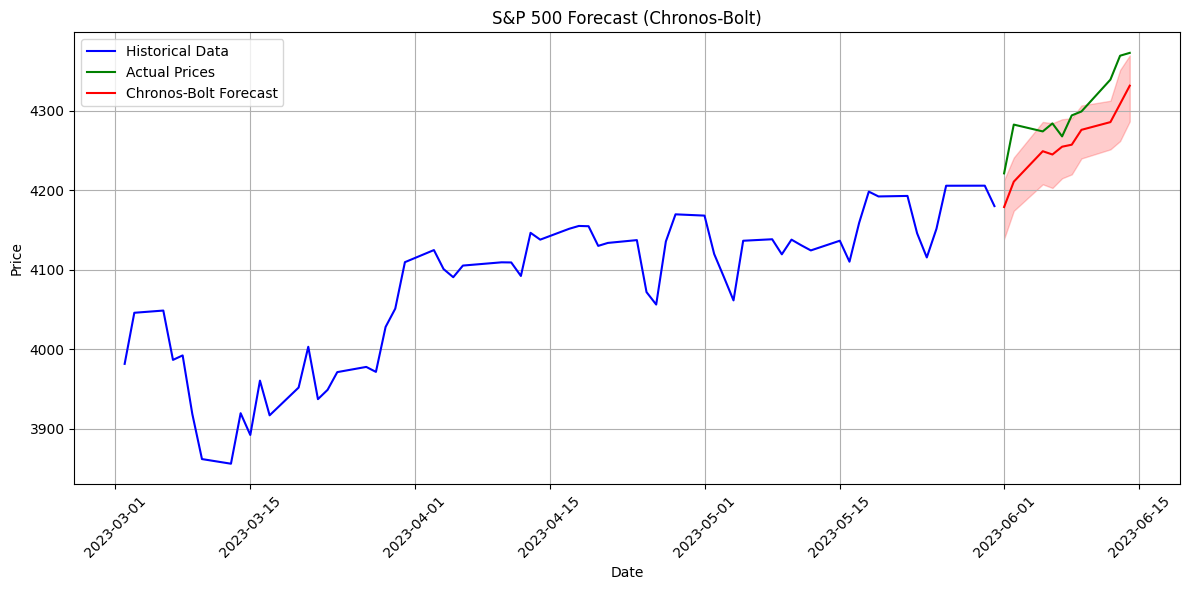

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.preprocessing import StandardScaler
from typing import Dict, List, Union, Tuple

from utils.metrics import calculate_metrics

# Shared Constants - ensure these match with the other implementation
CONTEXT_WINDOW = 63      
FORECAST_STEPS = 5
CONFIDENCE_ALPHA = 0.2    # 80% confidence interval
MIN_CONTEXT_SIZE = 10     # Minimum context size required for all models

# ======================
# Chronos-Bolt Implementation
# ======================
class ChronosBoltPredictor:
    def __init__(self):
        # Initialize properties, but don't create predictor yet
        self.predictors = {}  # Store a predictor for each step

    def _prepare_data_for_model(self, data: pd.DataFrame, start_idx: int, current_idx: int) -> Tuple[TimeSeriesDataFrame, str]:
        """
        Prepare TimeSeriesDataFrame for model fitting/prediction.
        Returns the formatted data and the item_id used.
        """
        # Get context data up to but not including the current point
        context_data = data.iloc[max(0, current_idx-CONTEXT_WINDOW):current_idx].copy()
        
        # Check if item_id column exists; if not, use a default value
        if 'item_id' not in context_data.columns:
            item_id = 'default_id'
            context_data['item_id'] = item_id
        else:
            # Get the unique item_id (assuming there's only one)
            unique_ids = context_data['item_id'].unique()
            if len(unique_ids) != 1:
                print(f"Warning: Expected 1 unique item_id, found {len(unique_ids)}. Using the first one.")
            item_id = unique_ids[0]
        
        # Convert to TimeSeriesDataFrame with proper error handling
        try:
            context_tsdf = TimeSeriesDataFrame.from_data_frame(
                df=context_data,
                id_column='item_id',
                timestamp_column='Date'
            )
            
            # Verify the data format
            if len(context_tsdf) == 0:
                raise ValueError("Empty TimeSeriesDataFrame created")
                
            # Verify item_id exists in the data
            if item_id not in context_tsdf.index.get_level_values(0).unique():
                raise ValueError(f"Item ID '{item_id}' not found in TimeSeriesDataFrame index")
                
            return context_tsdf, item_id
            
        except Exception as e:
            print(f"Error creating TimeSeriesDataFrame: {str(e)}")
            print("Context data sample:")
            print(context_data.head())
            raise e

    def sliding_window_forecast(self, data: pd.DataFrame, start_idx: int) -> Dict[str, List]:
        """
        Perform one-step forecasts using sliding window approach,
        refitting the model at each step like the ARIMA/T5 implementation.
        """
        forecasts = {'median': [], 'low': [], 'high': [], 'dates': []}
        
        # Sliding window prediction
        for i in range(FORECAST_STEPS):
            current_idx = start_idx + i
            
            # Check if we have enough context data
            available_context = min(CONTEXT_WINDOW, current_idx)
            if available_context < MIN_CONTEXT_SIZE:
                raise ValueError(f"Insufficient context data at step {i}. Need at least {MIN_CONTEXT_SIZE} points.")
            
            try:
                # Prepare context data and convert to TimeSeriesDataFrame
                context_tsdf, item_id = self._prepare_data_for_model(data, start_idx, current_idx)
                
                # Create and fit a new predictor for this step
                predictor = TimeSeriesPredictor(
                    prediction_length=1,
                    target="Close",
                    quantile_levels=[0.1, 0.5, 0.9],
                    freq='D', 
                )
                
                # Fit the model on context data (refit at each step)
                print(f"Step {i+1}/{FORECAST_STEPS}: Fitting model on {len(context_tsdf)} data points")
                predictor.fit(context_tsdf, presets="bolt_base")
                
                # Generate prediction
                forecast = predictor.predict(context_tsdf)
                
                # Safely extract the forecast values
                if len(forecast) == 0:
                    raise ValueError("Empty forecast dataframe returned")
                
                # Verify structure and item_id
                if item_id not in forecast.index.get_level_values(0).unique():
                    raise ValueError(f"Forecast doesn't contain item_id '{item_id}'")
                
                # Get the first prediction row (there should be exactly one for each quantile)
                forecast_values = forecast.loc[item_id]
                
                # Store the results
                forecasts['dates'].append(data['Date'].iloc[current_idx])
                forecasts['low'].append(forecast_values['0.1'].iloc[0])
                forecasts['median'].append(forecast_values['0.5'].iloc[0])
                forecasts['high'].append(forecast_values['0.9'].iloc[0])
                
            except Exception as e:
                print(f"Error in forecast step {i+1}: {str(e)}")
                # Fallback to using last observed value with small adjustments
                if i > 0:
                    # Use previous prediction if available
                    last_pred = forecasts['median'][-1]
                    forecasts['dates'].append(data['Date'].iloc[current_idx])
                    forecasts['low'].append(last_pred * 0.99)
                    forecasts['median'].append(last_pred)
                    forecasts['high'].append(last_pred * 1.01)
                else:
                    # Use last observed value
                    last_val = data['Close'].iloc[current_idx-1]
                    forecasts['dates'].append(data['Date'].iloc[current_idx])
                    forecasts['low'].append(last_val * 0.99)
                    forecasts['median'].append(last_val)
                    forecasts['high'].append(last_val * 1.01)
        
        return forecasts

# ======================
# Plotting
# ======================
def plot_individual_forecast(data, start_idx, forecasts, model_name, actual_data=None):
    """Plotting function with proper index alignment and verification."""
    plt.figure(figsize=(12, 6))
    
    # Historical data (context window before forecast start)
    historical_start = max(0, start_idx - CONTEXT_WINDOW)
    historical = data.iloc[historical_start:start_idx]
    plt.plot(historical['Date'], historical['Close'], 'b-', label='Historical Data')
    
    # Actual values with verified indices
    actual_dates = data['Date'].iloc[start_idx:start_idx+FORECAST_STEPS]
    actual_values = data['Close'].iloc[start_idx:start_idx+FORECAST_STEPS]
    
    if actual_data is not None:
        # Use provided actual data if available
        if len(actual_data) != len(actual_dates):
            print(f"Warning: Provided actual data length ({len(actual_data)}) doesn't match expected ({len(actual_dates)})")
        
        plt.plot(actual_dates[:len(actual_data)], actual_data, 'g-', label='Actual Prices')
    else:
        plt.plot(actual_dates, actual_values, 'g-', label='Actual Prices')
    
    # Forecasts with alignment validation
    forecast_dates = forecasts['dates']
    if len(forecast_dates) != len(actual_dates):
        print(f"Warning: Forecast length ({len(forecast_dates)}) doesn't match actual data length ({len(actual_dates)})")
        # Use the minimum length for plotting
        plot_length = min(len(forecast_dates), len(actual_dates))
        forecast_dates = forecast_dates[:plot_length]
        actual_dates = actual_dates[:plot_length]
    
    # Plot forecast median and confidence interval
    plt.plot(forecast_dates, forecasts['median'][:len(forecast_dates)], 'r-', label=f'{model_name} Forecast')
    plt.fill_between(
        forecast_dates, 
        forecasts['low'][:len(forecast_dates)], 
        forecasts['high'][:len(forecast_dates)], 
        color='red', 
        alpha=0.2
    )
    
    plt.title(f'S&P 500 Forecast ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ======================
# Multiple Trials
# ======================
def run_multiple_trials(data, start_idx, n_trials=10):
    """
    Run multiple trials of Chronos-Bolt forecasting and compute average metrics.
    """
    # Get insample data for metric calculation (same approach as ARIMA/T5)
    insample = data['Close'].iloc[max(0, start_idx-CONTEXT_WINDOW):start_idx].values
    
    # Get actual data for the forecast horizon
    actual = data['Close'].iloc[start_idx:start_idx+FORECAST_STEPS].values
    
    # Verify we have enough context data
    if start_idx < MIN_CONTEXT_SIZE:
        raise ValueError(f"Start index {start_idx} too small, need at least {MIN_CONTEXT_SIZE} samples for context")
    
    # Chronos-bolt trials
    chronos_metrics_list = []
    chronos_preds = None
    
    for trial in range(n_trials):
        try:
            print(f"Starting trial {trial+1}/{n_trials}")
            chronos = ChronosBoltPredictor()
            chronos_preds = chronos.sliding_window_forecast(data, start_idx)
            
            # Verify that predictions and actuals are aligned
            if len(chronos_preds['median']) != len(actual):
                print(f"Warning: Prediction length ({len(chronos_preds['median'])}) doesn't match actual length ({len(actual)})")
                # Use the minimum length for metrics
                min_len = min(len(chronos_preds['median']), len(actual))
                metrics_actual = actual[:min_len]
                metrics_pred = chronos_preds['median'][:min_len]
            else:
                metrics_actual = actual
                metrics_pred = chronos_preds['median']
            
            chronos_metrics = calculate_metrics(metrics_actual, metrics_pred, insample=insample)
            chronos_metrics_list.append(chronos_metrics)
            print(f"Trial {trial+1} metrics:", chronos_metrics)
            
        except Exception as e:
            print(f"Error in trial {trial+1}: {str(e)}")
            import traceback
            traceback.print_exc()
    
    # Calculate average and std for Chronos metrics
    if not chronos_metrics_list:
        print("No successful trials to compute metrics from!")
        return None, None, None
    
    chronos_avg_metrics = {}
    chronos_std_metrics = {}
    
    for metric in chronos_metrics_list[0].keys():
        values = [m[metric] for m in chronos_metrics_list]
        chronos_avg_metrics[metric] = np.mean(values)
        chronos_std_metrics[metric] = np.std(values)
    
    return chronos_avg_metrics, chronos_std_metrics, chronos_preds

# ======================
# Main Function
# ======================
def main():
    # Load and process the data
    from data.snp500 import snp500_daily
    snp500 = snp500_daily
    
    # Check for multi-level columns and flatten if needed
    if isinstance(snp500.columns, pd.MultiIndex):
        print("Flattening multi-level columns")
        snp500.columns = snp500.columns.get_level_values(0)
    
    # Ensure we have the required columns
    required_cols = ['Date', 'Close']
    missing_cols = [col for col in required_cols if col not in snp500.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Add item_id column if it doesn't exist
    if 'item_id' not in snp500.columns:
        snp500['item_id'] = 'SPX'
    
    # Simplify to just the columns we need
    snp500 = snp500[['Date', 'Close', 'item_id']]
        
    # Define the target date for forecasting
    target_date_str = '2023-05-31'
    try:
        target_date = pd.Timestamp(target_date_str)
        date_indices = snp500[snp500['Date'] <= target_date].index
        if len(date_indices) == 0:
            raise ValueError(f"No dates before {target_date_str} found in the dataset")
        start_idx = date_indices[-1]  # Start forecasting from the next day
    except Exception as e:
        print(f"Error finding test start date: {str(e)}")
        # Fall back to using 80% of data as training
        start_idx = int(len(snp500) * 0.8)
        print(f"Falling back to using index {start_idx} as forecast start")
    
    # Ensure we have enough context window
    if start_idx < CONTEXT_WINDOW:
        print(f"Warning: Start index {start_idx} less than context window {CONTEXT_WINDOW}")
        print(f"Using all available data ({start_idx} points) for context")
    
    # Run multiple trials
    n_trials = 1  # Reduced for testing, increase for production
    try:
        print(f"Running {n_trials} trials for Chronos-Bolt-Base")
        chronos_avg_metrics, chronos_std_metrics, chronos_preds = run_multiple_trials(
            snp500, start_idx, n_trials
        )
        
        if chronos_avg_metrics is not None:
            print(f"\nChronos-Bolt Metrics (Average ± Std over {n_trials} runs):")
            for metric in chronos_avg_metrics:
                print(f"{metric}: {chronos_avg_metrics[metric]:.4f} ± {chronos_std_metrics[metric]:.4f}")
            
            # Visualization with last trial predictions
            if chronos_preds is not None:
                plot_individual_forecast(snp500, start_idx, chronos_preds, "Chronos-Bolt")
            else:
                print("No valid forecast available for plotting")
        else:
            print("No metrics available - all trials failed")
        
    except Exception as e:
        print(f"Error running trials: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()